In [1]:
import pandas as pd
import matplotlib

## Fazendo análises relacionando colunas dos microdados do Enem 2019

In [2]:
# Importando apenas as colunas TP_SEXO e NU_NOTA_REDACAO
microdadosEnem_SEXO_NOTAREDACAO = pd.read_csv('brutos/MICRODADOS_ENEM_2019.csv', sep=';', encoding='ISO-8859-1', usecols=['TP_SEXO', 'NU_NOTA_REDACAO'])

In [3]:
microdadosEnem_SEXO_NOTAREDACAO.head()

,TP_SEXO,NU_NOTA_REDACAO
0,M,780.0
1,F,600.0
2,F,640.0
3,M,NaN
4,M,NaN


In [4]:
# Obtendo os sexos e as notas de redação dos candidatos e removendo os NaN
microdadosEnem_SEXO_NOTAREDACAO = microdadosEnem_SEXO_NOTAREDACAO.dropna()
microdadosEnem_SEXO_NOTAREDACAO.head()

,TP_SEXO,NU_NOTA_REDACAO
0,M,780.0
1,F,600.0
2,F,640.0
5,M,580.0
6,F,360.0


In [5]:
# Quantos candidatos de cada sexo?
microdadosEnem_SEXO_NOTAREDACAO.groupby('TP_SEXO').count()

,NU_NOTA_REDACAO
TP_SEXO,
F,2336431
M,1586713


In [7]:
# Qual a nota máxima obtida pelos candidados de cada sexo?
microdadosEnem_SEXO_NOTAREDACAO.groupby('TP_SEXO').max()

,NU_NOTA_REDACAO
TP_SEXO,
F,1000.0
M,1000.0


In [9]:
# Qual a nota mínima obtida pelos candidatos de cada sexo?
microdadosEnem_SEXO_NOTAREDACAO.groupby('TP_SEXO').min()

,NU_NOTA_REDACAO
TP_SEXO,
F,0.0
M,0.0


In [13]:
# Qual a nota mínima maior que 0 obtida pelos candidatos de cada sexo?
microdadosEnem_SEXO_NOTAREDACAO[microdadosEnem_SEXO_NOTAREDACAO['NU_NOTA_REDACAO'] > 0].groupby('TP_SEXO').min()

,NU_NOTA_REDACAO
TP_SEXO,
F,40.0
M,40.0


In [14]:
# Qual a nota média obtida pelos candidatos de cada sexo, levando em consideração as notas maiores que 0?
microdadosEnem_SEXO_NOTAREDACAO[microdadosEnem_SEXO_NOTAREDACAO['NU_NOTA_REDACAO'] > 0].groupby('TP_SEXO').mean()

,NU_NOTA_REDACAO
TP_SEXO,
F,597.266353
M,586.431510


In [16]:
# Qual a nota mediana obtida pelos candidatos de cada sexo, levando em consideração as notas maiores que 0?
microdadosEnem_SEXO_NOTAREDACAO[microdadosEnem_SEXO_NOTAREDACAO['NU_NOTA_REDACAO'] > 0].groupby('TP_SEXO').median()

,NU_NOTA_REDACAO
TP_SEXO,
F,580.0
M,580.0


TP_SEXO
F    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
M    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

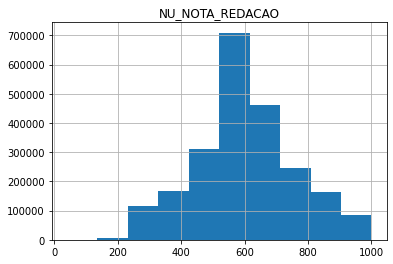

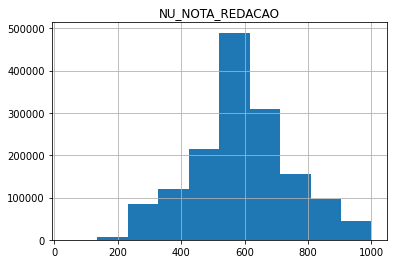

In [17]:
# Vamos ver um histograma dessas notas?
microdadosEnem_SEXO_NOTAREDACAO[microdadosEnem_SEXO_NOTAREDACAO['NU_NOTA_REDACAO'] > 0].groupby('TP_SEXO').hist()

Com esses dados podemos perceber que o sexo dos candidatos não é exatamente um critério muito relevante para analisar esses dados, pois os resultados são muito parecidos.

In [20]:
# Todas essas informações que calculamos e comentamos podem ser obtidas pelo método "describe()"
microdadosEnem_SEXO_NOTAREDACAO.groupby('TP_SEXO').describe()

NU_NOTA_REDACAO                                                    \
                  count        mean         std  min    25%    50%    75%   
TP_SEXO                                                                     
F             2336431.0  577.159368  187.536483  0.0  480.0  580.0  680.0   
M             1586713.0  562.396035  190.214499  0.0  480.0  580.0  660.0   

                 
            max  
TP_SEXO          
F        1000.0  
M        1000.0

In [21]:
# Quantos % dos candidatos de cada sexo tiram 900 ou mais na redação do Enem?
(microdadosEnem_SEXO_NOTAREDACAO[microdadosEnem_SEXO_NOTAREDACAO['NU_NOTA_REDACAO'] >= 900].value_counts('TP_SEXO')/microdadosEnem_SEXO_NOTAREDACAO.value_counts('TP_SEXO'))*100.0

TP_SEXO
F    4.799371
M    3.811842
dtype: float64